In [1]:
!echo "https://noteable.edina.ac.uk/user/$(jupyter notebook list | grep -oP '(?<=user\/).*(?=\/\?)' )/tree?token=$( jupyter notebook list | grep -oP '(?<=token=).*(?= ::)' )"

https://noteable.edina.ac.uk/user/sydovg2nqqfsazpsnqw6bm/tree?token=CLgfR_gUT2WRgi24Y-RvlQ


In [2]:
# import cell
import os
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# load dataset into dataframe
spotify_data_raw = pd.read_csv('https://www.inf.ed.ac.uk/teaching/courses/fds/data/project-2021-2022/spotify/data.csv.zip')
spotify_data_raw

,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec
...,...,...,...,...,...,...,...
3441192,196,More Than You Know,Axwell /\ Ingrosso,2126,https://open.spotify.com/track/71bBFbfn2OBK5Qw...,2018-01-09,hk
3441193,197,Issues,Julia Michaels,2117,https://open.spotify.com/track/7vu0JkJh0ldukEY...,2018-01-09,hk
3441194,198,Tuo Fei Lun,Eason Chan,2112,https://open.spotify.com/track/0pmGleExiQyd0Hx...,2018-01-09,hk
3441195,199,面具,Alfred Hui,2102,https://open.spotify.com/track/58SUsgamkW6vFFq...,2018-01-09,hk


In [4]:
# -------- initial data exploration --------
column_names = spotify_data_raw.columns
column_names

Index(['Position', 'Track Name', 'Artist', 'Streams', 'URL', 'Date', 'Region'], dtype='object')

In [5]:
# a dictionary of initial unique values in each column (column name: unique values)
columns_unique_dict = {}
for name in column_names:
    columns_unique_dict[name] = spotify_data_raw[name].unique()
columns_unique_dict

{'Position': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175, 1

In [6]:
# transform the region codes to all caps
spotify_data_raw["Region"] = spotify_data_raw["Region"].transform(lambda code: code.upper())

In [7]:
# -------- data cleaning & processing --------
# remove the URL column - no use for it, excessive data
cleaned_spotify_data = spotify_data_raw.copy()

# since we have a question to investigate which day of the week and month there are more streams, we add "Day Of Week" and "Day Of Month"
cleaned_spotify_data["Day Of Month"] = cleaned_spotify_data["Date"].transform(lambda date: int(date[-2:]))
cleaned_spotify_data["Day Of Week"] = cleaned_spotify_data["Date"].transform(lambda date: datetime.strptime(date,'%Y-%m-%d').weekday())

In [8]:
# check for NaN values
for column in cleaned_spotify_data.columns:  # print out number of NaN values in each column: identify where the NaNs are
    print(column, cleaned_spotify_data[column].isnull().sum())

# drop na values in track names, as we definitely cannot predict those from the other values
cleaned_spotify_data = cleaned_spotify_data.dropna(axis=0, subset=["Artist"])

# print out number of NaN values in each column again
for column in cleaned_spotify_data.columns:
    print(column, cleaned_spotify_data[column].isnull().sum())
# Note: result is 0 - no more NaNs left!
# Cleaned 67 rows

# delete the "URL" column from our DataFrame
cleaned_spotify_data = cleaned_spotify_data.drop(columns="URL")

Position 0
Track Name 657
Artist 657
Streams 0
URL 8
Date 0
Region 0
Day Of Month 0
Day Of Week 0
Position 0
Track Name 0
Artist 0
Streams 0
URL 0
Date 0
Region 0
Day Of Month 0
Day Of Week 0


In [9]:
cleaned_spotify_data

,Position,Track Name,Artist,Streams,Date,Region,Day Of Month,Day Of Week
0,1,Reggaetón Lento (Bailemos),CNCO,19272,2017-01-01,EC,1,6
1,2,Chantaje,Shakira,19270,2017-01-01,EC,1,6
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,2017-01-01,EC,1,6
3,4,Vente Pa' Ca,Ricky Martin,14954,2017-01-01,EC,1,6
4,5,Safari,J Balvin,14269,2017-01-01,EC,1,6
...,...,...,...,...,...,...,...,...
3441192,196,More Than You Know,Axwell /\ Ingrosso,2126,2018-01-09,HK,9,1
3441193,197,Issues,Julia Michaels,2117,2018-01-09,HK,9,1
3441194,198,Tuo Fei Lun,Eason Chan,2112,2018-01-09,HK,9,1
3441195,199,面具,Alfred Hui,2102,2018-01-09,HK,9,1


In [10]:
regionCode_data = pd.read_csv("regioncodes_to_names.csv")
regionCode_data = regionCode_data[["name","alpha-2"]].copy()
regionCode_data

,name,alpha-2
0,Afghanistan,AF
1,Åland Islands,AX
2,Albania,AL
3,Algeria,DZ
4,American Samoa,AS
...,...,...
244,Wallis and Futuna,WF
245,Western Sahara,EH
246,Yemen,YE
247,Zambia,ZM


In [11]:
regionName_dict = dict(zip(regionCode_data['alpha-2'], regionCode_data['name']))
regionName_dict['GLOBAL'] = 'Global'
regionName_dict["GB"] = "United Kingdom"
regionName_dict

{'AF': 'Afghanistan',
 'AX': 'Åland Islands',
 'AL': 'Albania',
 'DZ': 'Algeria',
 'AS': 'American Samoa',
 'AD': 'Andorra',
 'AO': 'Angola',
 'AI': 'Anguilla',
 'AQ': 'Antarctica',
 'AG': 'Antigua and Barbuda',
 'AR': 'Argentina',
 'AM': 'Armenia',
 'AW': 'Aruba',
 'AU': 'Australia',
 'AT': 'Austria',
 'AZ': 'Azerbaijan',
 'BS': 'Bahamas',
 'BH': 'Bahrain',
 'BD': 'Bangladesh',
 'BB': 'Barbados',
 'BY': 'Belarus',
 'BE': 'Belgium',
 'BZ': 'Belize',
 'BJ': 'Benin',
 'BM': 'Bermuda',
 'BT': 'Bhutan',
 'BO': 'Bolivia (Plurinational State of)',
 'BQ': 'Bonaire, Sint Eustatius and Saba',
 'BA': 'Bosnia and Herzegovina',
 'BW': 'Botswana',
 'BV': 'Bouvet Island',
 'BR': 'Brazil',
 'IO': 'British Indian Ocean Territory',
 'BN': 'Brunei Darussalam',
 'BG': 'Bulgaria',
 'BF': 'Burkina Faso',
 'BI': 'Burundi',
 'CV': 'Cabo Verde',
 'KH': 'Cambodia',
 'CM': 'Cameroon',
 'CA': 'Canada',
 'KY': 'Cayman Islands',
 'CF': 'Central African Republic',
 'TD': 'Chad',
 'CL': 'Chile',
 'CN': 'China',
 'CX

In [12]:
cleaned_spotify_data["Region Name"] = cleaned_spotify_data["Region"].transform(lambda code: regionName_dict[code])

In [13]:
cleaned_spotify_data

,Position,Track Name,Artist,Streams,Date,Region,Day Of Month,Day Of Week,Region Name
0,1,Reggaetón Lento (Bailemos),CNCO,19272,2017-01-01,EC,1,6,Ecuador
1,2,Chantaje,Shakira,19270,2017-01-01,EC,1,6,Ecuador
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,2017-01-01,EC,1,6,Ecuador
3,4,Vente Pa' Ca,Ricky Martin,14954,2017-01-01,EC,1,6,Ecuador
4,5,Safari,J Balvin,14269,2017-01-01,EC,1,6,Ecuador
...,...,...,...,...,...,...,...,...,...
3441192,196,More Than You Know,Axwell /\ Ingrosso,2126,2018-01-09,HK,9,1,Hong Kong
3441193,197,Issues,Julia Michaels,2117,2018-01-09,HK,9,1,Hong Kong
3441194,198,Tuo Fei Lun,Eason Chan,2112,2018-01-09,HK,9,1,Hong Kong
3441195,199,面具,Alfred Hui,2102,2018-01-09,HK,9,1,Hong Kong


In [14]:
# add region names to our dictionary of unique column values
columns_unique_dict["Region Name"] = cleaned_spotify_data["Region Name"].unique()
columns_unique_dict["Region"] = cleaned_spotify_data["Region"].unique()
columns_unique_dict

{'Position': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175, 1

In [15]:
pos_streams_df = cleaned_spotify_data[["Position", "Streams", "Region Name", "Day Of Week", "Day Of Month"]].copy()
pos_streams_df["LogStreams"] = pos_streams_df["Streams"].transform(lambda streams: np.log10(streams)) # turn the streams into a log scale
pos_streams_df["IsFri"] = pos_streams_df["Day Of Week"].transform(lambda day: int(day==4))
pos_streams_df["IsSat"] = pos_streams_df["Day Of Week"].transform(lambda day: int(day==5))
pos_streams_df["IsSun"] = pos_streams_df["Day Of Week"].transform(lambda day: int(day==6))

In [16]:
pos_streams_df["IsWeekend"] = pos_streams_df["Day Of Week"].transform(lambda day: int(day==4 or day==5 or day==6))

In [17]:
pos_streams_df

,Position,Streams,Region Name,Day Of Week,Day Of Month,LogStreams,IsFri,IsSat,IsSun,IsWeekend
0,1,19272,Ecuador,6,1,4.284927,0,0,1,1
1,2,19270,Ecuador,6,1,4.284882,0,0,1,1
2,3,15761,Ecuador,6,1,4.197584,0,0,1,1
3,4,14954,Ecuador,6,1,4.174757,0,0,1,1
4,5,14269,Ecuador,6,1,4.154394,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
3441192,196,2126,Hong Kong,1,9,3.327563,0,0,0,0
3441193,197,2117,Hong Kong,1,9,3.325721,0,0,0,0
3441194,198,2112,Hong Kong,1,9,3.324694,0,0,0,0
3441195,199,2102,Hong Kong,1,9,3.322633,0,0,0,0


Text(0.5, 1.0, 'Correlation of Position to Streams in Ecuador')

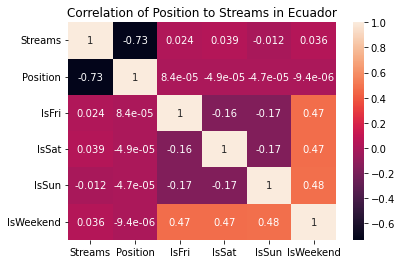

In [52]:
sns.heatmap(pos_streams_df[pos_streams_df["Region Name"] == "Ecuador"][["Streams", "Position", "IsFri", "IsSat", "IsSun", "IsWeekend"]].corr(), annot=True)
plt.title("Correlation of Position to Streams in Ecuador")

Text(0.5, 1.0, 'Correlation of Position to Log Streams in Ecuador')

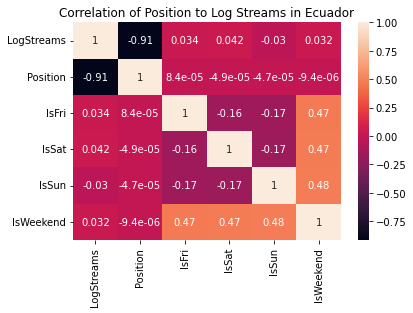

In [53]:
sns.heatmap(pos_streams_df[pos_streams_df["Region Name"] == "Ecuador"][["LogStreams", "Position", "IsFri", "IsSat", "IsSun", "IsWeekend"]].corr(), annot=True)
plt.title("Correlation of Position to Log Streams in Ecuador")

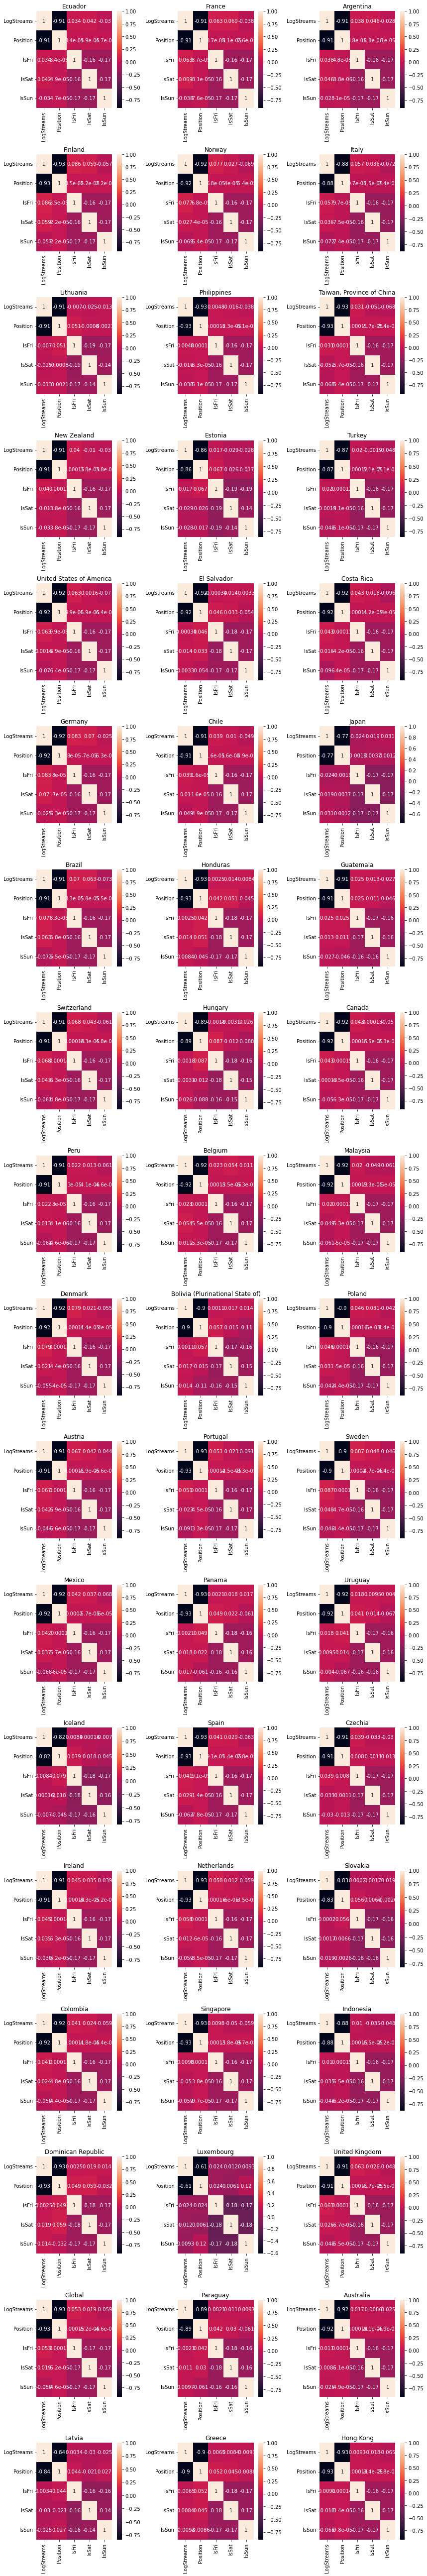

In [54]:
# now plot a heatmap for all of the regions...this is going to be fun
fig_streamsToPosition, ax_streamsToPosition = plt.subplots(18,3)
fig_streamsToPosition.set_size_inches(6*2, 36*2)

count = 0
for regionName in columns_unique_dict["Region Name"]:
    i = count // 3
    j = count % 3
    count += 1
    region_df = pos_streams_df[pos_streams_df["Region Name"] == regionName]
    sns.heatmap(region_df[["LogStreams", "Position", "IsFri", "IsSat", "IsSun"]].corr(), annot=True, ax=ax_streamsToPosition[i][j])
    ax_streamsToPosition[i][j].set_title(regionName)

fig_streamsToPosition.tight_layout()

In [55]:
fig_streamsToPosition.savefig("position_stream_dayofweek_correlation_heatmap.png")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54


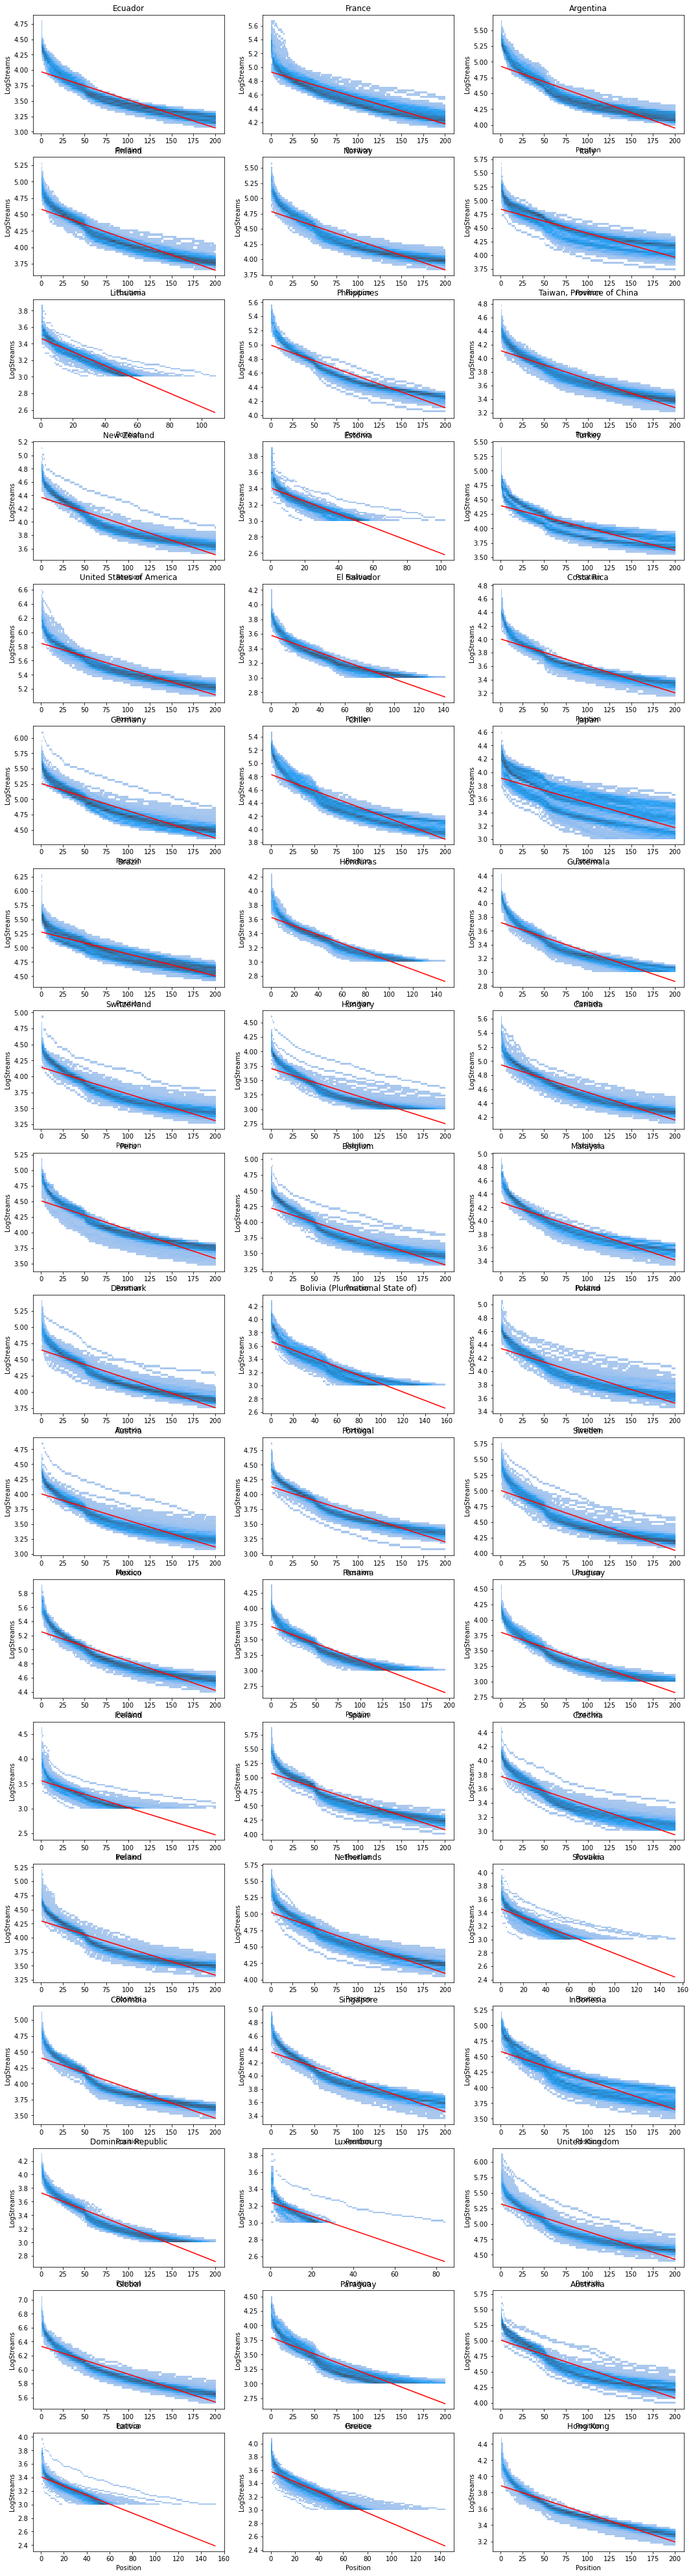

In [18]:
# linear regression
import statsmodels.formula.api as smf

fig_linReg, ax_linReg = plt.subplots(18,3)
fig_linReg.set_size_inches(6*3, 36*2)

counter = 0
for regionName in columns_unique_dict["Region Name"]:
    i = counter // 3
    j = counter % 3
    counter += 1
    print(counter)
    region_df = pos_streams_df[pos_streams_df["Region Name"] == regionName]
    model = smf.ols('LogStreams ~ Position', data=region_df)
    results = model.fit()
    y_hat = results.predict(region_df["Position"])
    sns.histplot(data=region_df, x="Position", y="LogStreams", bins=50, discrete=(True,False), ax=ax_linReg[i][j])
    sns.lineplot(x=region_df["Position"], y=y_hat, color='r', ax=ax_linReg[i][j])
    ax_linReg[i][j].set_title(regionName)

In [19]:
fig_linReg.tight_layout()

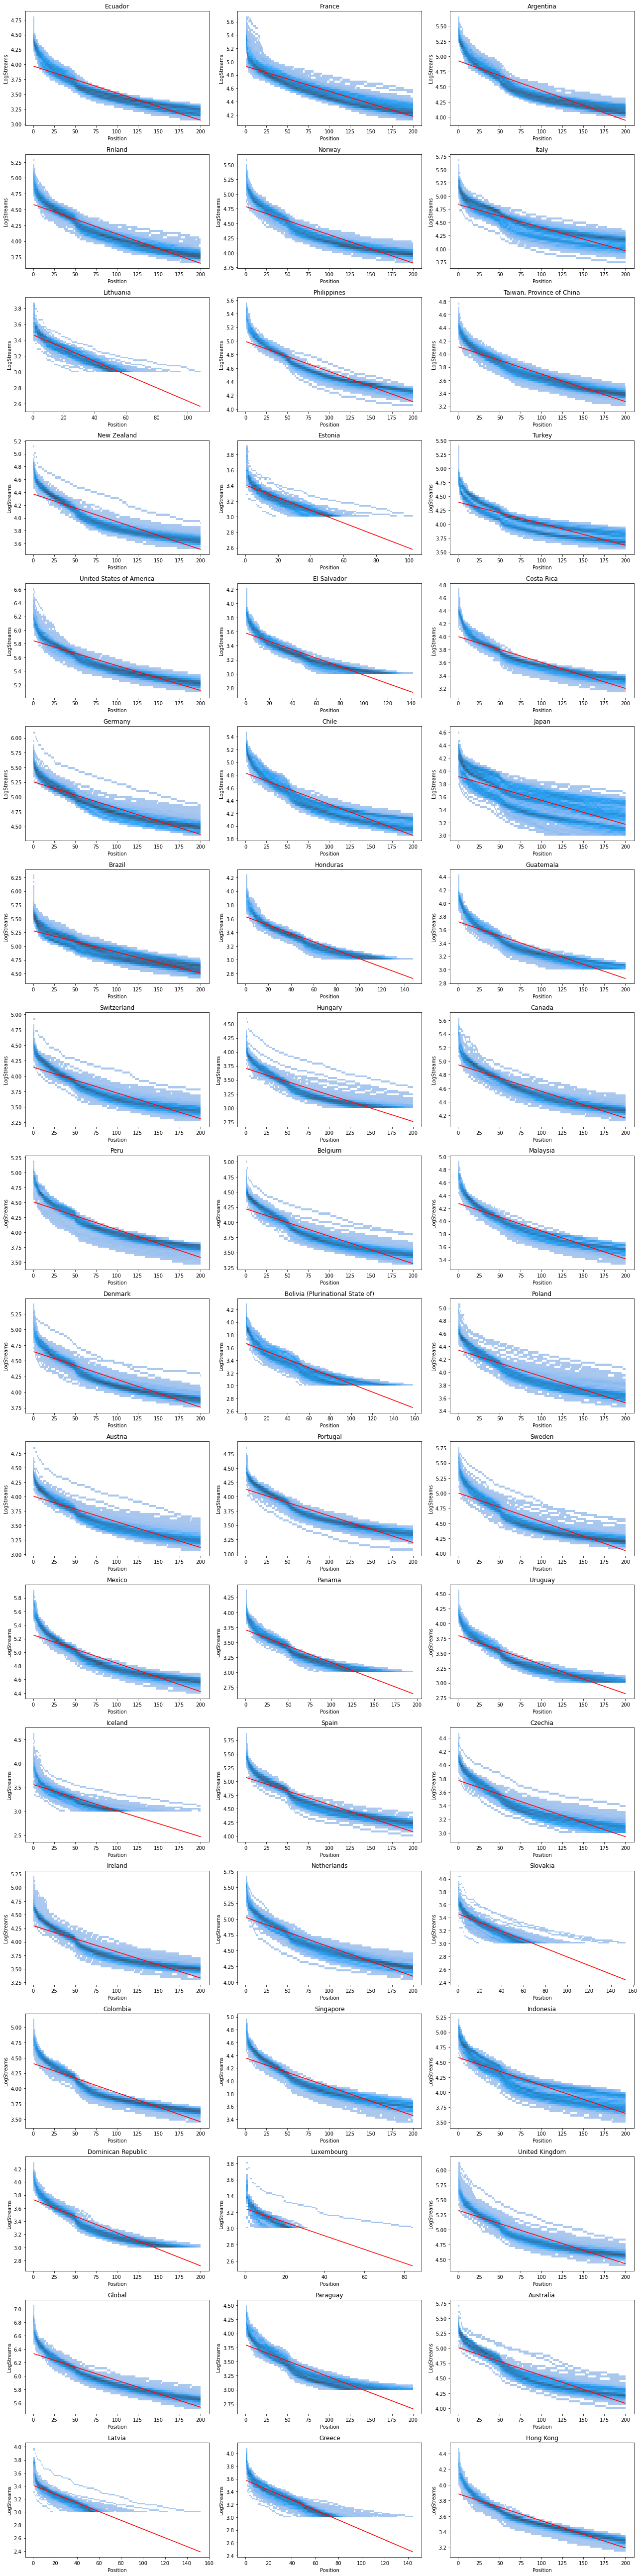

In [20]:
fig_linReg

In [21]:
fig_linReg.savefig("linreg_position_streams_byregions_density.png")